### データロガーで測定した値を確認してみる。

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\支給品振動モータ使用_振動値測定'

In [3]:
#ファイル選択
df_recivedata = pd.read_csv(r"vibrationmoter_0003.CSV")

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
0,'21-12-03 14:24:14.462,0.994,1.48,1.52,1.53,1.51
1,'21-12-03 14:24:14.472,0.994,1.54,1.52,1.53,1.51
2,'21-12-03 14:24:14.482,1.000,1.48,1.52,1.53,1.51
3,'21-12-03 14:24:14.492,1.000,1.49,1.52,1.54,1.51
4,'21-12-03 14:24:14.502,0.998,1.53,1.52,1.53,1.51


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
33415,'21-12-03 14:29:48.612,1.000,1.53,1.51,1.53,1.50
33416,'21-12-03 14:29:48.622,1.000,1.48,1.51,1.53,1.50
33417,'21-12-03 14:29:48.632,0.997,1.51,1.52,1.52,1.50
33418,'21-12-03 14:29:48.642,1.000,1.49,1.51,1.53,1.49
33419,'21-12-03 14:29:48.652,1.000,1.52,1.51,1.53,1.50


### U1-1は瞬時流量4-20mAと249.3Ωを掛けて電圧値に直したもの。
### U1-2は加速度センサ1のX軸値、U1-3は加速度センサ1のY軸値。
### U1-4は加速度センサ2のX軸値、U1-5は加速度センサ2のY軸値。　である。

In [4]:
df_recivedata.count()

Time       33420
U1-1[V]    33420
U1-2[V]    33420
U1-3[V]    33420
U1-4[V]    33420
U1-5[V]    33420
dtype: int64

### データフレームの値に欠損値は無い。
### 瞬時流量の電圧値を実際の瞬時流量値(l/h)に直してみる。

In [5]:
#dfにカラムを追加（計算値）
df_recivedata['U2-1'] = ((df_recivedata['U1-1[V]'] * 250 / 249.3) - 1) * 7200 / 4

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-03 14:24:14.462,0.994,1.48,1.52,1.53,1.51,-5.776173
1,'21-12-03 14:24:14.472,0.994,1.54,1.52,1.53,1.51,-5.776173
2,'21-12-03 14:24:14.482,1.000,1.48,1.52,1.53,1.51,5.054152
3,'21-12-03 14:24:14.492,1.000,1.49,1.52,1.54,1.51,5.054152
4,'21-12-03 14:24:14.502,0.998,1.53,1.52,1.53,1.51,1.444043


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
33415,'21-12-03 14:29:48.612,1.000,1.53,1.51,1.53,1.50,5.054152
33416,'21-12-03 14:29:48.622,1.000,1.48,1.51,1.53,1.50,5.054152
33417,'21-12-03 14:29:48.632,0.997,1.51,1.52,1.52,1.50,-0.361011
33418,'21-12-03 14:29:48.642,1.000,1.49,1.51,1.53,1.49,5.054152
33419,'21-12-03 14:29:48.652,1.000,1.52,1.51,1.53,1.50,5.054152


### マイナスの瞬時流量は0にFIXする

In [6]:
df_recivedata.loc[df_recivedata['U2-1'] < 0, 'U2-1'] = 0 

In [7]:
#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-03 14:24:14.462,0.994,1.48,1.52,1.53,1.51,0.000000
1,'21-12-03 14:24:14.472,0.994,1.54,1.52,1.53,1.51,0.000000
2,'21-12-03 14:24:14.482,1.000,1.48,1.52,1.53,1.51,5.054152
3,'21-12-03 14:24:14.492,1.000,1.49,1.52,1.54,1.51,5.054152
4,'21-12-03 14:24:14.502,0.998,1.53,1.52,1.53,1.51,1.444043


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
33415,'21-12-03 14:29:48.612,1.000,1.53,1.51,1.53,1.50,5.054152
33416,'21-12-03 14:29:48.622,1.000,1.48,1.51,1.53,1.50,5.054152
33417,'21-12-03 14:29:48.632,0.997,1.51,1.52,1.52,1.50,0.000000
33418,'21-12-03 14:29:48.642,1.000,1.49,1.51,1.53,1.49,5.054152
33419,'21-12-03 14:29:48.652,1.000,1.52,1.51,1.53,1.50,5.054152


### 必要ない列は消す。

In [8]:
df_recivedata = df_recivedata.drop(["Time", "U1-1[V]"], axis = 1)

df_recivedata

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,1.48,1.52,1.53,1.51,0.000000
1,1.54,1.52,1.53,1.51,0.000000
2,1.48,1.52,1.53,1.51,5.054152
3,1.49,1.52,1.54,1.51,5.054152
4,1.53,1.52,1.53,1.51,1.444043
...,...,...,...,...,...
33415,1.53,1.51,1.53,1.50,5.054152
33416,1.48,1.51,1.53,1.50,5.054152
33417,1.51,1.52,1.52,1.50,0.000000
33418,1.49,1.51,1.53,1.49,5.054152


### 散布図行列を書いてみる

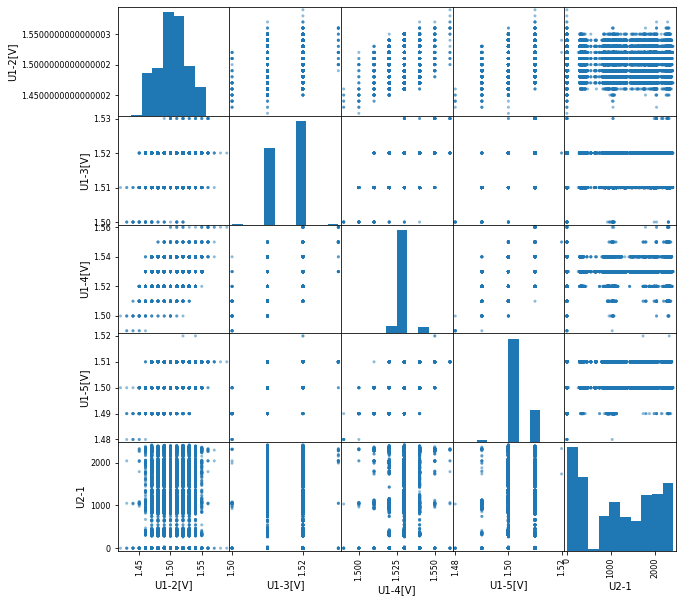

In [9]:
pd.plotting.scatter_matrix(df_recivedata, figsize=(10,10))
plt.show()

### 相関を見る。

In [10]:
df_recivedata.corr()

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
U1-2[V],1.000000,0.125799,0.054783,0.372065,0.018157
U1-3[V],0.125799,1.000000,0.170676,0.381599,0.157829
U1-4[V],0.054783,0.170676,1.000000,0.266482,0.054837
U1-5[V],0.372065,0.381599,0.266482,1.000000,0.035776
U2-1,0.018157,0.157829,0.054837,0.035776,1.000000


### ヒートマップにして表示する。

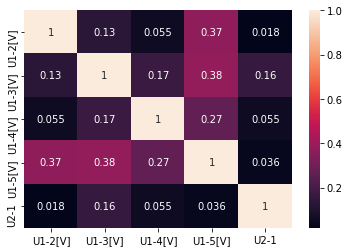

In [12]:
sns.heatmap(df_recivedata.corr(), annot=True)
plt.show()

### 相関が無い事が判った。